## Machine Learning
#### K-means algorithm
*Look into heirarchical clustering

Check out later:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

In [2]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

data_frame = pd.read_csv("pleiades.csv")
pleiades = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades

,ra,dec,parallax,parallax_error,pmra,pmdec,b,l
0,56.544299,23.852152,0.449200,1.287650,1.811370,-3.520140,-23.843327,166.613013
1,57.065831,23.696713,0.415548,0.454624,3.821199,-0.520381,-23.636025,167.112412
2,56.639273,23.967605,1.542492,0.044328,5.941891,-12.181140,-23.699488,166.598436
3,56.445009,23.650847,0.864438,0.086946,9.922333,-3.693149,-24.053476,166.687393
4,56.838247,23.721293,2.765235,0.837524,-1.259323,-1.460526,-23.758842,166.926627
...,...,...,...,...,...,...,...,...
5415,56.851072,24.562739,0.271612,0.154048,0.412120,-1.212464,-23.129119,166.318168
5416,57.154146,24.588707,0.640921,0.367009,2.845384,0.602387,-22.924295,166.520538
5417,56.631130,24.333363,1.848843,0.027132,-8.812954,-11.748794,-23.433535,166.324375
5418,56.690905,24.575902,0.086584,0.181614,2.168727,-0.534046,-23.217166,166.191130


In [3]:
train = pleiades.head(3794)
test = pleiades.tail(1626)

#weighted fractions
from sklearn.cluster import KMeans

# create kmeans object, 2 clusters
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(train.values) #X = data set excluding name of galaxy
# save new clusters for chart
y_km = kmeans.predict(train.values) #or fit_predict

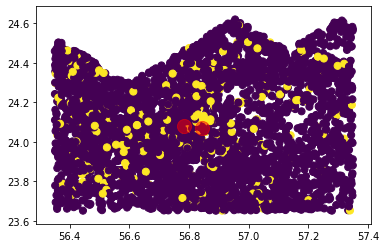

In [4]:
#.values - changes pandas dataframe to numpy array
plt.scatter(train.values[:, 0], train.values[:, 1], c=y_km, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)